In [44]:
from data import _read_vrp
from map import Map

%load_ext autoreload
%autoreload 2


data, meta_data = _read_vrp('sample_data/X-n5.vrp')
print(meta_data)
data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'name': 'X-n5', 'comment': 'Generated by Uchoa, Pecin, Pessoa, Poggi, Subramanian, and Vidal (2013)', 'type': 'CVRP', 'dimension': 5, 'edge_weight_type': 'EUC_2D', 'capacity': 206, 'depots': ['1', '4']}


,NODE_COORD,DEMAND,ID,IS_DEPOT
0,"(365.0, 689.0)",0,1,True
1,"(146.0, 180.0)",38,2,False
2,"(792.0, 5.0)",51,3,False
3,"(658.0, 510.0)",73,4,True
4,"(461.0, 270.0)",70,5,False


In [50]:
map = Map()
# map.create_map_from_file('sample_data/X-n5.vrp', 'cvrp')
# map.create_map_from_file('sample_data/X-n101-k25.vrp', 'cvrp')
map.create_map_from_file('sample_data/X-n1001-k43.vrp', 'cvrp')
# map.distances

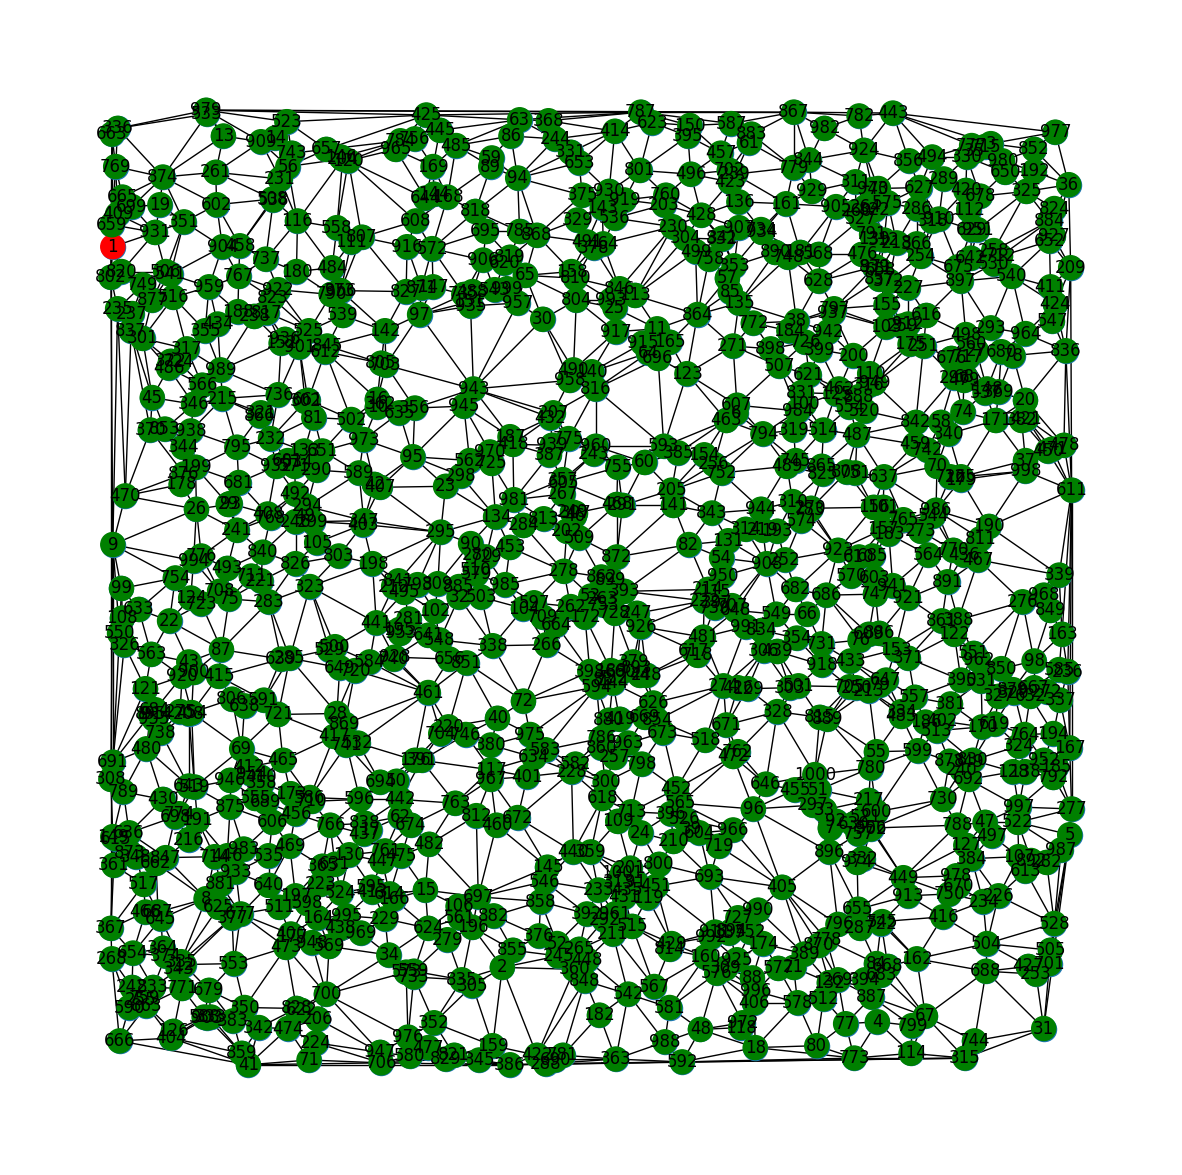

In [51]:
map.create_net_by_voronoi()
map.draw()